In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import re

In [2]:
"embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton"
df = pd.read_csv("titanic-passengers.csv", sep=';')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.Age = df.Age.fillna(df.Age.median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,28.0,0,0,349215,7.8958,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [7]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  889 non-null    bool 
 1   Survived     889 non-null    bool 
 2   Pclass       889 non-null    bool 
 3   Name         889 non-null    bool 
 4   Sex          889 non-null    bool 
 5   Age          889 non-null    bool 
 6   SibSp        889 non-null    bool 
 7   Parch        889 non-null    bool 
 8   Ticket       889 non-null    bool 
 9   Fare         889 non-null    bool 
 10  Embarked     889 non-null    bool 
dtypes: bool(11)
memory usage: 16.5 KB


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [11]:
encoder = {"Sex": {"male": 0, "female": 1}, "Survived": {"Yes": 1, "No": 0}}

df.replace(encoder, inplace=True)

In [12]:
df = pd.concat([df, pd.get_dummies(df.Embarked)], axis=1)

In [13]:
df.head()
df.drop("Embarked", axis=1, inplace=True)

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1,0,0
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,1,0,0
888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,0,0,1
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,349215,7.8958,0,0,1


In [15]:
df['Title']=0
df['Title'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0,0,1,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0,0,1,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0,0,1,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0,0,1,Mrs
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1,0,0,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,2669,7.2292,1,0,0,Mr
888,535,0,3,"Cacic, Miss. Marija",1,30.0,0,0,315084,8.6625,0,0,1,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,349215,7.8958,0,0,1,Mr


In [17]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Title
0,0,2,0,28.0,0,0,13.0000,0,0,1,Mr
1,0,3,0,25.0,0,0,7.6500,0,0,1,Mr
2,0,3,0,20.0,0,0,7.8542,0,0,1,Mr
3,0,3,1,29.0,0,4,21.0750,0,0,1,Mrs
4,0,1,0,31.0,1,0,52.0000,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,1,0,30.0708,1,0,0,Mrs
887,0,3,0,22.0,0,0,7.2292,1,0,0,Mr
888,0,3,1,30.0,0,0,8.6625,0,0,1,Miss
889,0,3,0,28.0,0,0,7.8958,0,0,1,Mr


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


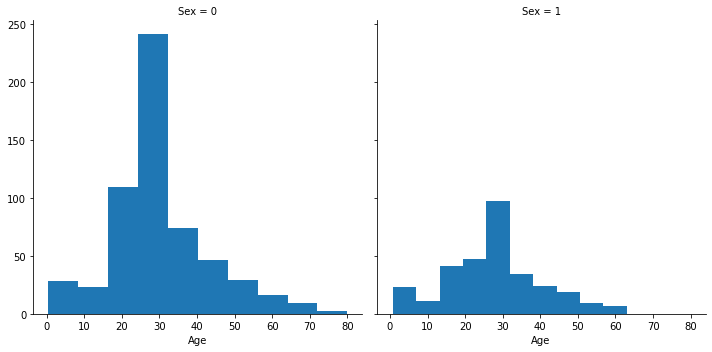

In [19]:
# Age and Sex 
grid = sns.FacetGrid(df, col='Sex', size=5, aspect=1, legend_out=False)
grid.map(plt.hist, 'Age', bins=10)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


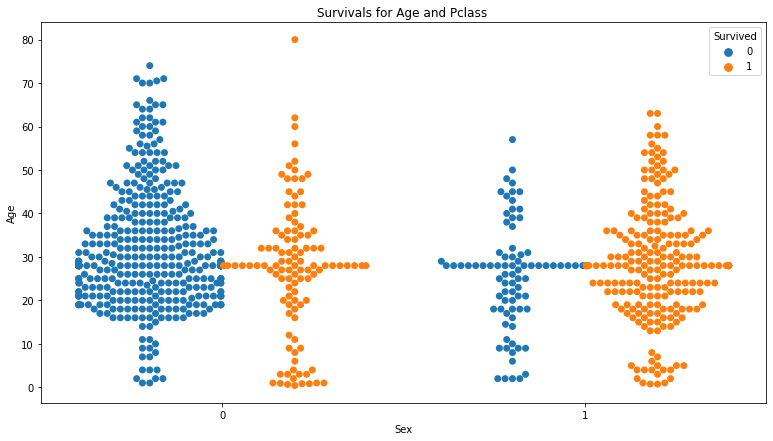

In [20]:
#Age and Sex in terms of Survival
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Sex', y='Age', hue='Survived', split=True, data=df , size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


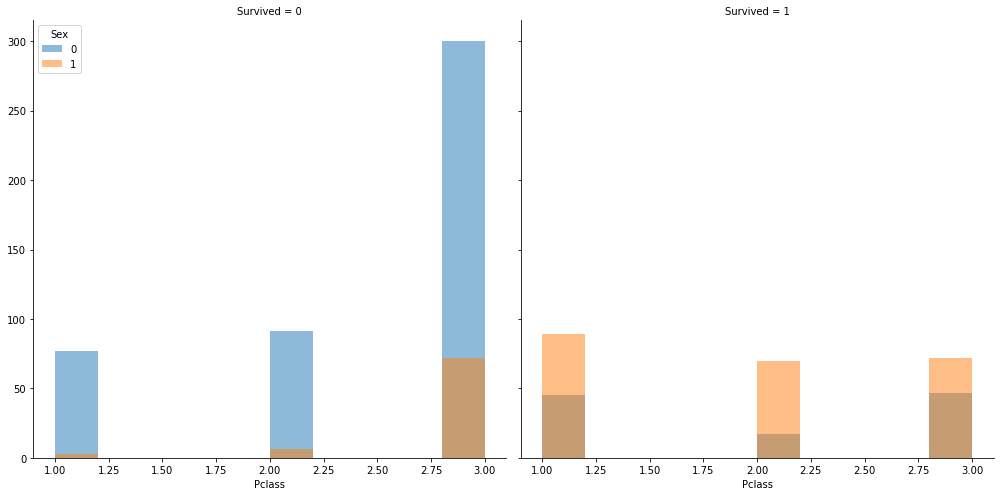

In [21]:
#Number of survivors in terms of sex and Pclass. 
import seaborn as sns
grid = sns.FacetGrid(df, col='Survived', hue='Sex', size=7, aspect=1, legend_out=False)
grid.map(plt.hist, 'Pclass', alpha=.5, bins=10)
grid.add_legend();

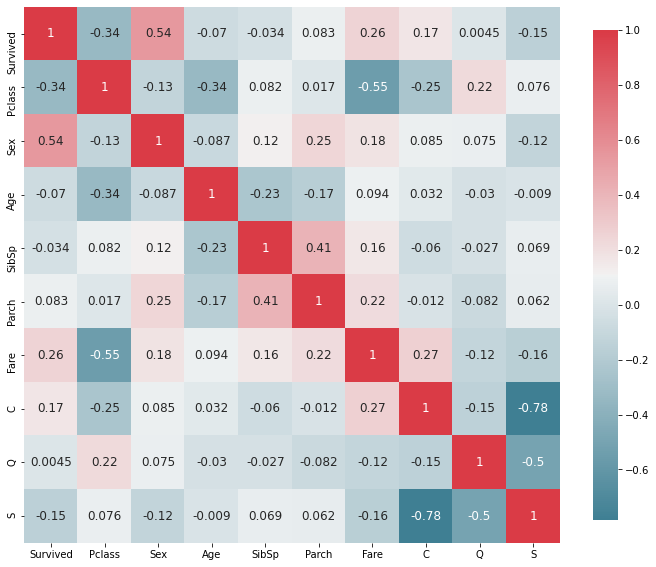

In [22]:
#Paragraph: The heatmap shows a summary of the relation between features and which ones are the most or least significant.
#For example, if we look at survival and sex, we can see that there is a positive relation in which: 
#if the number goes up "Female =1", higher the changes of survival are. 

corr = df.corr()

s , ax = plt.subplots(figsize =( 12 , 10 ) )

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

sns.heatmap(df.corr(), cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


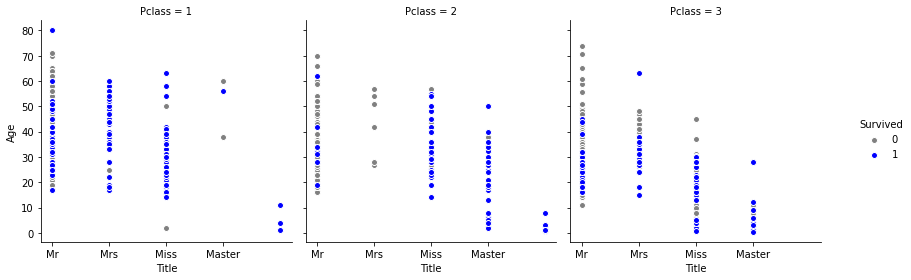

In [23]:
#Title in relation to Pclass and Survival
g = sns.FacetGrid(df, hue="Survived", col="Pclass", margin_titles=True, size=4, aspect=1,
                  palette={1:"blue", 0:"gray"})
g=g.map(plt.scatter, "Title", "Age",edgecolor="w").add_legend();

In [24]:
#relation between Pclass and survived 
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [25]:
#Family size 
for dataset in [df]:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Title,FamilySize
0,0,2,0,28.0,0,0,13.0000,0,0,1,Mr,1
1,0,3,0,25.0,0,0,7.6500,0,0,1,Mr,1
2,0,3,0,20.0,0,0,7.8542,0,0,1,Mr,1
3,0,3,1,29.0,0,4,21.0750,0,0,1,Mrs,5
4,0,1,0,31.0,1,0,52.0000,0,0,1,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,1,0,30.0708,1,0,0,Mrs,2
887,0,3,0,22.0,0,0,7.2292,1,0,0,Mr,1
888,0,3,1,30.0,0,0,8.6625,0,0,1,Miss,1
889,0,3,0,28.0,0,0,7.8958,0,0,1,Mr,1


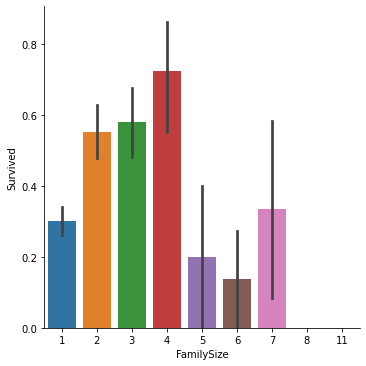

In [26]:
#Family size and survival
sns.catplot(x="FamilySize", y="Survived", data=df, kind="bar")
plt.show()

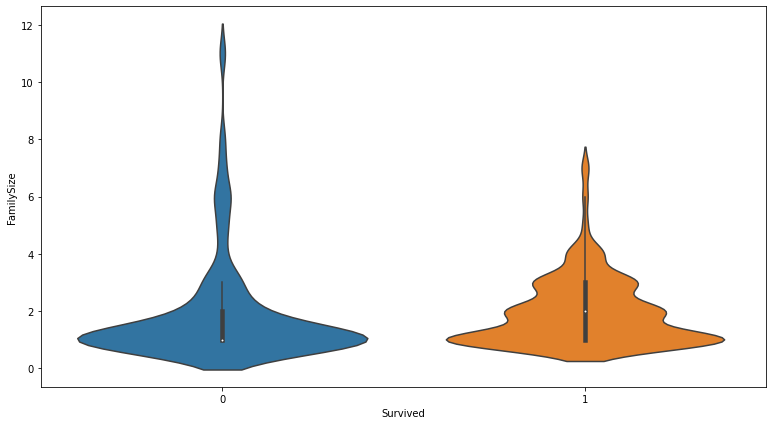

In [27]:
#Family size and survival another way because I like violinplot :D 
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.violinplot(x="Survived", y="FamilySize", data=df)

In [28]:
#finally done! This was a challenging checkpoint, I wish it was written in proper steps in order to make it easier to follow
#Off to the next chapter :) 

Checkpoint 5 - Logistic Regression:
In this checkpoint, we are going to work again on the Titanic data set, but this time we will use logistic regression to predict if a passenger will survive or not. 

1. Apply logistic regression. 

2. Use a confusion matrix to validate your model. 

3. Another validation matrix for classification is ROC / AUC, do your research on them explain them, and apply them in our case.
 

In [60]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

#features extraction
x = df[['Sex','FamilySize','Age','Pclass']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

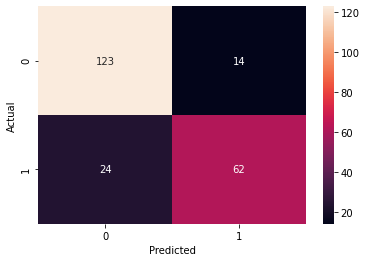

In [62]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='.5g')

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       137
           1       0.82      0.72      0.77        86

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_probabilities = logreg.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_probabilities[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = np.zeros(len(y_test))
rand_fpr, rand_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# # auc scores
auc_score = roc_auc_score(y_test, pred_probabilities[:,1])
print(auc_score)

0.8768035987098963


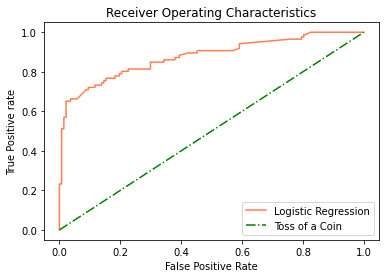

In [83]:
plt.plot(fpr, tpr, linestyle='-',color='coral', label='Logistic Regression')
plt.plot(rand_fpr, rand_tpr, linestyle='-.', color='green', label='Toss of a Coin')

# title
plt.title('Receiver Operating Characteristics')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

ROC (Receiver Operating Characteristics) & AUC  (Area Under The Curve) is a way to evaluate the performance of logistic regression. ROC is a probability curve in which it is represented as the orange  line in the previous plot whereas AUC is the  degree or measure of separability presented as the area under the orange line. As seen in graph, two parameters are plotted which are the True Positive (y axis) and the False Positive (x axis). The evaluation of the performance of logistic regression is determined by how high the AUC is as it becomes better at predicting 0 classes as 0 and 1 classes as 1. 

 In order to better predict the survivals, the highest point in the graph should be chosen in order to cover as much as possible. The highest point would be 0.9 in the graph above. This is a good performance as the accuracy of the AUC is 0.87 which means it can predict 87% of the data correctly. 